# サウンドファイルをFFTして振幅スペクトルを表示するスクリプト

## Usage
filenameとformatをサウンドファイルに合わせて書き直してください．

## WAV素材サイト
https://www3.nd.edu/~dthain/courses/cse20211/fall2013/wavfile/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
import scipy.signal
import pydub

# 入力ファイルの名前とフォーマット形式の設定
filename = 'sine3.wav'
format = 'wav'

# 音楽ファイル読み込み
data = pydub.AudioSegment.from_file(filename, format)
y = data.get_array_of_samples()

In [3]:
# 窓関数（ハン窓）
w = scipy.signal.windows.hann(len(y))

# FFT
yf = scipy.fftpack.fft(y * w)

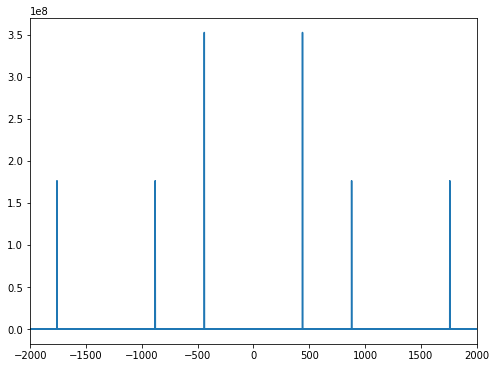

In [4]:
# 出力するグラフのサイズ設定
plt.rcParams['figure.figsize'] = (8, 6)

# x軸
rate = float(pydub.utils.mediainfo(filename)['sample_rate'])
x = scipy.fftpack.fftfreq(len(yf), 1 / rate)

# 出力するグラフのx軸の範囲設定
plt.xlim(-2000, 2000)

# グラフの表示
plt.plot(x, np.abs(yf))
plt.show()